# Bonneville Dam Data Source

http://www.cbr.washington.edu/dart/query/adult_annual_sum


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import linregress
import numpy as np

In [2]:
# Read in Bonneville Dam Spring Chinook Counts
bonneville_file = "Resources/Chinook_Bonneville_Counts.csv"

# Grab only the columns we want
bonneville_salmon_df = pd.read_csv(bonneville_file, usecols=["Project","Year","Dates", "Chinook"])

# Make sure we only get 2000 to 2020
bonneville_salmon_df =  bonneville_salmon_df[ 
    (bonneville_salmon_df["Year"] > 1999) & 
    (bonneville_salmon_df["Year"] < 2021)
]

# Clean up data types
bonneville_salmon_df["Year"] = bonneville_salmon_df["Year"].astype('int')
bonneville_salmon_df["Chinook"] = bonneville_salmon_df["Chinook"].astype('int')

bonneville_salmon_df

,Project,Year,Dates,Chinook
62,Bonneville,2000,3/15 - 5/31,178302
63,Bonneville,2001,3/15 - 5/31,391367
64,Bonneville,2002,3/15 - 5/31,268813
65,Bonneville,2003,3/15 - 5/31,192010
66,Bonneville,2004,3/15 - 5/31,170152
67,Bonneville,2005,3/15 - 5/31,74038
68,Bonneville,2006,3/15 - 5/31,96456
69,Bonneville,2007,3/15 - 5/31,66624
70,Bonneville,2008,3/15 - 5/31,125543
71,Bonneville,2009,3/15 - 5/31,114525


## Bonneville Above Data Source-Stevenson

https://waterdata.usgs.gov/nwis/inventory?agency_code=USGS&site_no=14128600

mapper: https://maps.waterdata.usgs.gov/mapper/index.html


In [3]:
#read in gage data for Stevenson
stevenson_file = "Resources/Columbia_bonne_stevenson.csv"
Columbia_bonne_stevenson_df = pd.read_csv(stevenson_file, sep="\t")
Columbia_bonne_stevenson_df

,agency_cd,site_no,datetime,Gage_Max,Status_Gage_Max,Gage_min,Status_gage_min,Gage_Mean,Status_Gage_Mean
0,USGS,14128600,2008-10-01,76.23,A,75.93,A,76.05,A
1,USGS,14128600,2008-10-02,76.33,A,76.03,A,76.21,A
2,USGS,14128600,2008-10-03,76.53,A,76.03,A,76.33,A
3,USGS,14128600,2008-10-04,76.33,A,76.03,A,76.11,A
4,USGS,14128600,2008-10-05,76.43,A,76.13,A,76.31,A
...,...,...,...,...,...,...,...,...,...
4412,USGS,14128600,2020-10-30,73.59,P,72.70,P,72.95,P
4413,USGS,14128600,2020-10-31,75.11,P,73.59,P,74.44,P
4414,USGS,14128600,2020-11-01,75.13,P,74.30,P,74.58,P
4415,USGS,14128600,2020-11-02,74.67,P,74.07,P,74.30,P


In [4]:
#find rows with null values
Columbia_bonne_stevenson_df[Columbia_bonne_stevenson_df.isnull().values.any(axis=1)]

,agency_cd,site_no,datetime,Gage_Max,Status_Gage_Max,Gage_min,Status_gage_min,Gage_Mean,Status_Gage_Mean
4094,USGS,14128600,2019-12-17,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#drop unnecessary columns
cbs_clean_df = Columbia_bonne_stevenson_df.dropna()
cbs_clean_df = cbs_clean_df.reset_index(drop=True)
cbs_clean_df

,agency_cd,site_no,datetime,Gage_Max,Status_Gage_Max,Gage_min,Status_gage_min,Gage_Mean,Status_Gage_Mean
0,USGS,14128600,2008-10-01,76.23,A,75.93,A,76.05,A
1,USGS,14128600,2008-10-02,76.33,A,76.03,A,76.21,A
2,USGS,14128600,2008-10-03,76.53,A,76.03,A,76.33,A
3,USGS,14128600,2008-10-04,76.33,A,76.03,A,76.11,A
4,USGS,14128600,2008-10-05,76.43,A,76.13,A,76.31,A
...,...,...,...,...,...,...,...,...,...
4411,USGS,14128600,2020-10-30,73.59,P,72.70,P,72.95,P
4412,USGS,14128600,2020-10-31,75.11,P,73.59,P,74.44,P
4413,USGS,14128600,2020-11-01,75.13,P,74.30,P,74.58,P
4414,USGS,14128600,2020-11-02,74.67,P,74.07,P,74.30,P


In [6]:
#Get rid of columns you don't need
cbs_reduce_df = cbs_clean_df[['agency_cd', 'site_no', 'datetime', 'Gage_Mean']].copy(deep=True)
cbs_reduce_df.head()


,agency_cd,site_no,datetime,Gage_Mean
0,USGS,14128600,2008-10-01,76.05
1,USGS,14128600,2008-10-02,76.21
2,USGS,14128600,2008-10-03,76.33
3,USGS,14128600,2008-10-04,76.11
4,USGS,14128600,2008-10-05,76.31


In [7]:
#Split the data into three columns
cbs_reduce_df[['Year','Month','Day']] = cbs_reduce_df['datetime'].str.split('-', expand=True)
cbs_reduce_df = cbs_reduce_df.drop(columns=['datetime'])
cbs_reduce_df = cbs_reduce_df.reset_index(drop=True)
cbs_reduce_df.head()

,agency_cd,site_no,Gage_Mean,Year,Month,Day
0,USGS,14128600,76.05,2008,10,01
1,USGS,14128600,76.21,2008,10,02
2,USGS,14128600,76.33,2008,10,03
3,USGS,14128600,76.11,2008,10,04
4,USGS,14128600,76.31,2008,10,05


In [8]:
#changed the day, month, year columns to be numbers
cbs_reduce_df['Month'] = cbs_reduce_df['Month'].astype(int)
cbs_reduce_df['Year'] = cbs_reduce_df['Year'].astype(int)
cbs_reduce_df['Day'] = cbs_reduce_df['Day'].astype(int)
cbs_reduce_df.dtypes

agency_cd     object
site_no        int64
Gage_Mean    float64
Year           int32
Month          int32
Day            int32
dtype: object

In [9]:
#only bring in Mar, Apr, May data
cbs_final= cbs_reduce_df[(cbs_reduce_df['Month'] >= 3) & (cbs_reduce_df['Month'] <= 5)]
cbs_final.head()

,agency_cd,site_no,Gage_Mean,Year,Month,Day
151,USGS,14128600,75.39,2009,3,1
152,USGS,14128600,75.83,2009,3,2
153,USGS,14128600,75.65,2009,3,3
154,USGS,14128600,76.47,2009,3,4
155,USGS,14128600,76.57,2009,3,5


In [10]:
#Average the above data by year to get the gage average by year in the spring
cbs_final2_df = cbs_final.groupby("Year").mean()
cbs_final2_df.head()

,site_no,Gage_Mean,Month,Day
Year,,,,
2009,14128600,75.929348,4.0,15.836957
2010,14128600,75.806304,4.0,15.836957
2011,14128600,75.953152,4.0,15.836957
2012,14128600,76.115870,4.0,15.836957
2013,14128600,75.501739,4.0,15.836957


In [11]:
# Group by year to match the shape of the Bonneville Salmon Data
mean_cbs_final2_df = cbs_final2_df.groupby("Year").mean()
mean_cbs_final2_df = mean_cbs_final2_df[["site_no", "Gage_Mean"]].reset_index()
mean_cbs_final2_df

,Year,site_no,Gage_Mean
0,2009,14128600,75.929348
1,2010,14128600,75.806304
2,2011,14128600,75.953152
3,2012,14128600,76.115870
4,2013,14128600,75.501739
5,2014,14128600,75.816848
6,2015,14128600,74.972065
7,2016,14128600,75.549457
8,2017,14128600,76.478043
9,2018,14128600,75.858696


In [12]:
# Merge Salmon Data with CBS Gage data
merged_cbs_salmon_data_df = pd.merge(bonneville_salmon_df, mean_cbs_final2_df, on="Year")
merged_cbs_salmon_data_df

,Project,Year,Dates,Chinook,site_no,Gage_Mean
0,Bonneville,2009,3/15 - 5/31,114525,14128600,75.929348
1,Bonneville,2010,3/15 - 5/31,244385,14128600,75.806304
2,Bonneville,2011,3/15 - 5/31,167097,14128600,75.953152
3,Bonneville,2012,3/15 - 5/31,158075,14128600,76.115870
4,Bonneville,2013,3/15 - 5/31,83299,14128600,75.501739
5,Bonneville,2014,3/15 - 5/31,188078,14128600,75.816848
6,Bonneville,2015,3/15 - 5/31,220250,14128600,74.972065
7,Bonneville,2016,3/15 - 5/31,137176,14128600,75.549457
8,Bonneville,2017,3/15 - 5/31,83616,14128600,76.478043
9,Bonneville,2018,3/15 - 5/31,87890,14128600,75.858696


The r-value is: -0.10820992226646635
The r2-value is: 0.011709387276914689
The p-value is: 0.7378161533612835


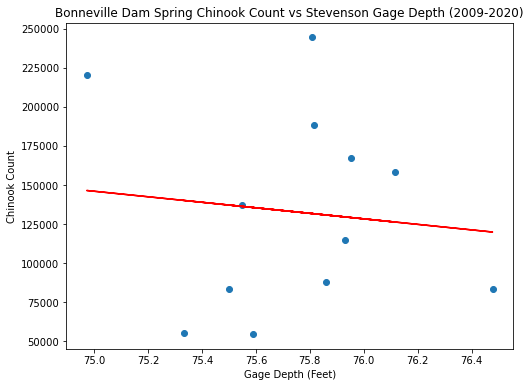

In [13]:
# Plot a scatter and regression of river depth and salmon counts to see if any correlation
annual_image_path = "Annual_Images/"
fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel("Gage Depth (Feet)")
plt.ylabel("Chinook Count")
plt.title("Bonneville Dam Spring Chinook Count vs Stevenson Gage Depth (2009-2020)")
plt.scatter(merged_cbs_salmon_data_df["Gage_Mean"],merged_cbs_salmon_data_df["Chinook"])
x_values = merged_cbs_salmon_data_df["Gage_Mean"]
y_values = merged_cbs_salmon_data_df["Chinook"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
#plt.figure(figsize=(12,8))

plt.savefig(annual_image_path + "above_bonneville_stevenson_annual_chinook_v_bar_gage.png")


plt.show()


## Bonneville Above Dam Water Temps
https://waterdata.usgs.gov/nwis/dv?referred_module=sw&site_no=453845121562000

In [14]:
# Get Forebay Temperature Data just above Bonneville
above_bonneville_forebay_file = "Resources/columbia_bonneville_forebay.csv"
above_bonneville_forebay_df = pd.read_csv(above_bonneville_forebay_file, sep="\t")
above_bonneville_forebay_df.head()

,agency_cd,site_no,datetime,tz_cd,temperature_c,status_temp,barometric,status_barmetric,pressure_gas,status_pressure_gas
0,USGS,453845121562000,2008-02-28 00:00,PST,5.1,A,766.0,A,792.0,A
1,USGS,453845121562000,2008-02-28 01:00,PST,5.1,A,766.0,A,792.0,A
2,USGS,453845121562000,2008-02-28 02:00,PST,5.0,A,767.0,A,792.0,A
3,USGS,453845121562000,2008-02-28 03:00,PST,5.0,A,766.0,A,791.0,A
4,USGS,453845121562000,2008-02-28 04:00,PST,5.0,A,766.0,A,791.0,A


In [15]:
# Reduce data frame down to columns that I need
clean_above_bonneville_forebay_temp_df = above_bonneville_forebay_df[["agency_cd", "site_no", "datetime", "temperature_c" ]].copy(deep=True)
clean_above_bonneville_forebay_temp_df.head()
#drop unnecessary columns
clean_above_bonneville_forebay_temp_df = clean_above_bonneville_forebay_temp_df.dropna()
clean_above_bonneville_forebay_temp_df = clean_above_bonneville_forebay_temp_df.reset_index(drop=True)
clean_above_bonneville_forebay_temp_df["temperature_c"]=clean_above_bonneville_forebay_temp_df["temperature_c"].astype("float")
clean_above_bonneville_forebay_temp_df

,agency_cd,site_no,datetime,temperature_c
0,USGS,453845121562000,2008-02-28 00:00,5.1
1,USGS,453845121562000,2008-02-28 01:00,5.1
2,USGS,453845121562000,2008-02-28 02:00,5.0
3,USGS,453845121562000,2008-02-28 03:00,5.0
4,USGS,453845121562000,2008-02-28 04:00,5.0
...,...,...,...,...
58873,USGS,453845121562000,2020-09-24 05:00,19.1
58874,USGS,453845121562000,2020-09-24 06:00,19.1
58875,USGS,453845121562000,2020-09-24 07:00,19.1
58876,USGS,453845121562000,2020-09-24 08:00,19.1


In [16]:
# Get the date fields for groupby
clean_above_bonneville_forebay_temp_df[["Date","Hour"]] = clean_above_bonneville_forebay_temp_df["datetime"].str.split(" ", expand=True)
clean_above_bonneville_forebay_temp_df = clean_above_bonneville_forebay_temp_df.drop(columns=["datetime"])
clean_above_bonneville_forebay_temp_df[["Year","Month", "Day"]] = clean_above_bonneville_forebay_temp_df["Date"].str.split("-", expand=True)

# Change the datatypes to int for filtering
clean_above_bonneville_forebay_temp_df["Year"] = clean_above_bonneville_forebay_temp_df["Year"].astype("int")
clean_above_bonneville_forebay_temp_df["Month"] = clean_above_bonneville_forebay_temp_df["Month"].astype("int")
clean_above_bonneville_forebay_temp_df["Day"] = clean_above_bonneville_forebay_temp_df["Day"].astype("int")

# Since this is the spring chinook spawn grab march to may
clean_above_bonneville_forebay_temp_df = clean_above_bonneville_forebay_temp_df[
    (clean_above_bonneville_forebay_temp_df["Month"] >= 3) &
    (clean_above_bonneville_forebay_temp_df["Month"] <= 5) 
].reset_index(drop=True)
clean_above_bonneville_forebay_temp_df


# Get the yearly mean for data shape
clean_above_bonneville_forebay_temp_mean_df = clean_above_bonneville_forebay_temp_df.groupby("Year").mean()
clean_above_bonneville_forebay_temp_mean_df

# Keep only columns we need
clean_above_bonneville_forebay_temp_mean_df = clean_above_bonneville_forebay_temp_mean_df[["site_no", "temperature_c"]]
clean_above_bonneville_forebay_temp_mean_df

,site_no,temperature_c
Year,,
2008,4.538451e+14,8.772361
2009,4.538451e+14,9.656450
2010,4.538451e+14,10.357500
2011,4.538451e+14,9.738436
2012,4.538451e+14,9.490812
2013,4.538451e+14,10.769777
2014,4.538451e+14,10.063594
2015,4.538451e+14,11.709347
2016,4.538451e+14,11.601190


In [17]:
# Merge salmon data with temperature data
merged_clean_above_bonneville_forebay_temp_mean_df = pd.merge(bonneville_salmon_df, clean_above_bonneville_forebay_temp_mean_df, on="Year" )

# Create a Farenhieght Temperature
merged_clean_above_bonneville_forebay_temp_mean_df['temperature_f'] = merged_clean_above_bonneville_forebay_temp_mean_df['temperature_c'] * 1.8 + 32

merged_clean_above_bonneville_forebay_temp_mean_df

,Project,Year,Dates,Chinook,site_no,temperature_c,temperature_f
0,Bonneville,2008,3/15 - 5/31,125543,4.538451e+14,8.772361,47.790249
1,Bonneville,2009,3/15 - 5/31,114525,4.538451e+14,9.656450,49.381610
2,Bonneville,2010,3/15 - 5/31,244385,4.538451e+14,10.357500,50.643500
3,Bonneville,2011,3/15 - 5/31,167097,4.538451e+14,9.738436,49.529186
4,Bonneville,2012,3/15 - 5/31,158075,4.538451e+14,9.490812,49.083462
5,Bonneville,2013,3/15 - 5/31,83299,4.538451e+14,10.769777,51.385599
6,Bonneville,2014,3/15 - 5/31,188078,4.538451e+14,10.063594,50.114469
7,Bonneville,2015,3/15 - 5/31,220250,4.538451e+14,11.709347,53.076824
8,Bonneville,2016,3/15 - 5/31,137176,4.538451e+14,11.601190,52.882143
9,Bonneville,2017,3/15 - 5/31,83616,4.538451e+14,8.974010,48.153218


The r-value is: 0.28689882282519924
The r2-value is: 0.08231093453848506
The p-value is: 0.34191485855970694


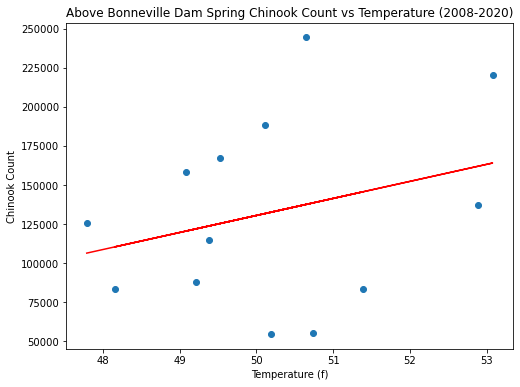

In [18]:
# Plot a scatter and regression of river temp and salmon counts to see if any correlation
fig, ax = plt.subplots(figsize=(8,6))

plt.xlabel("Temperature (f)")
plt.ylabel("Chinook Count")
plt.title("Above Bonneville Dam Spring Chinook Count vs Temperature (2008-2020)")
annual_image_path = "Annual_Images/"

plt.scatter(merged_clean_above_bonneville_forebay_temp_mean_df["temperature_f"],
            merged_clean_above_bonneville_forebay_temp_mean_df["Chinook"])
x_values = merged_clean_above_bonneville_forebay_temp_mean_df["temperature_f"]
y_values = merged_clean_above_bonneville_forebay_temp_mean_df["Chinook"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
#plt.figure(figsize=(8,6))

plt.savefig(annual_image_path + "above_bonneville_stevenson_annual_temp_v_chinook.png")
plt.show()



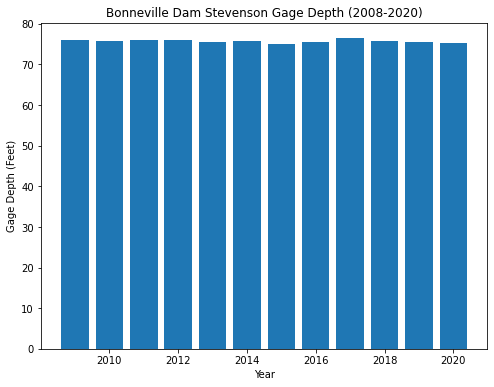

In [19]:
# Generate a bar plot showing the average gage feet by year using pyplot.
fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel("Year")
plt.ylabel("Gage Depth (Feet)")
plt.title("Bonneville Dam Stevenson Gage Depth (2008-2020)")
annual_image_path = "Annual_Images/"

plt.bar(merged_cbs_salmon_data_df["Year"],merged_cbs_salmon_data_df["Gage_Mean"])
x_values = merged_cbs_salmon_data_df["Gage_Mean"]
y_values = merged_cbs_salmon_data_df["Year"]

plt.savefig(annual_image_path + "above_bonneville_stevenson_annual_bar_gage.png")
plt.show()



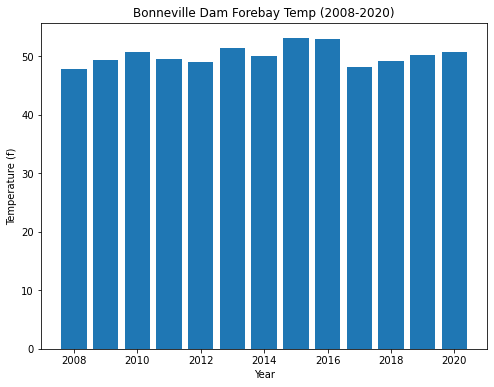

In [20]:
# Generate a bar plot showing the average water temp over years using pyplot.
fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel("Year")
plt.ylabel("Temperature (f)")
plt.title("Bonneville Dam Forebay Temp (2008-2020)")
annual_image_path = "Annual_Images/"

plt.bar(merged_clean_above_bonneville_forebay_temp_mean_df["Year"],merged_clean_above_bonneville_forebay_temp_mean_df["temperature_f"])
x_values = merged_clean_above_bonneville_forebay_temp_mean_df["temperature_f"]
y_values = merged_clean_above_bonneville_forebay_temp_mean_df["Year"]


plt.savefig(annual_image_path + "above_bonneville_stevenson_annual_temp.png")
plt.show()



In [21]:
# Merge to dataframe CSVS
merged_cbs_salmon_data_df.to_csv("Resources/merged_columbia_bonneville_stevenson_salmon_data_df.csv", index=False, header=True)
merged_clean_above_bonneville_forebay_temp_mean_df.to_csv("Resources/merged_clean_above_bonneville_forebay_temp_mean_df.csv", index=False, header=True)